# Includes test for:
0. Reports (Global and word level)
1. Visualizations
2. Debiasing
3. Metrics

# Reports

In [1]:
import numpy as np
import pandas as pd
import fee
import matplotlib.pyplot as plt
from fee.embedding import loader
from fee.reports import NeighboursAnalysis, GlobalReport, WordReport

In [2]:
E = loader.WE().load('../glove', normalize=True)

Direct bias (Bias by projection on the PCA based gender direction): 0.2685959041118622
Proximity bias (Ratio of biased neighbours by Indirect Bias): 0.35
Neighbour Analysis: 
       Neighbour  Bias by projection
0       pregnant            0.350458
1         matron            0.329037
2        midwife            0.282033
3         nurses            0.222142
4       midwives            0.211954
5   anesthetists            0.211205
6        nursing            0.183523
7    anesthetist            0.169238
8      therapist            0.117031
9        surgeon            0.084754
10       patient            0.066455
11     physician            0.062903
12    assistants            0.052341
13          care            0.051945
14      hospital            0.047711
15        doctor            0.044840
16       teacher            0.033853
17     paramedic            0.032778
18  practitioner            0.028392
19  veterinarian            0.021410
20       doctors            0.016578
21       de

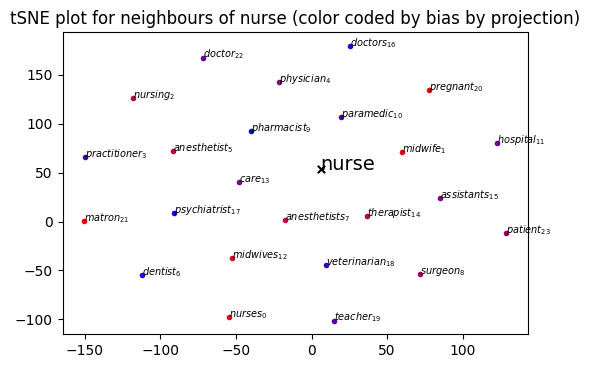

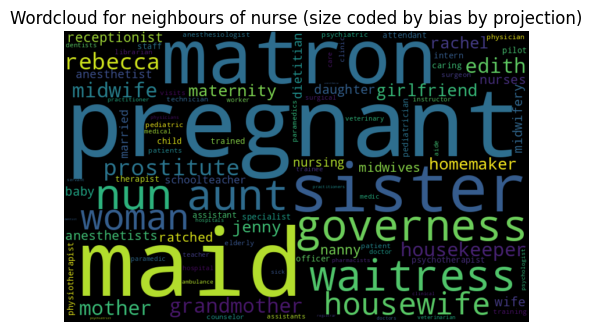

In [3]:
WordReport(E).generate('nurse', n=25)

In [4]:
report = NeighboursAnalysis(E).generate('nurse')
print(report)

       Neighbour  Bias by projection
0       pregnant            0.350458
1           maid            0.335656
2         sister            0.329533
3         matron            0.329037
4      governess            0.314358
..           ...                 ...
94       dentist            0.006777
95  psychiatrist            0.005188
96    anesthesia            0.004078
97    pharmacist            0.000646
98        dental            0.000037

[99 rows x 2 columns]


            words  bias by projection
0         adelpha            0.436408
1    menstruating            0.409625
2         iuliana            0.405080
3        tsarevna            0.403369
4       maksakova            0.399012
..            ...                 ...
95       pregnant            0.350458
96          afife            0.350312
97          inion            0.350204
98  congresswoman            0.350204
99        gorgons            0.350178

[100 rows x 2 columns] 

          words  bias by projection
0      impales        3.640726e-05
1      descend        3.626570e-05
2   khasakhala        3.583357e-05
3        tanur        3.526919e-05
4   burlesques        3.470480e-05
..         ...                 ...
95         niv        2.545305e-06
96   callously        9.434298e-07
97    subdural        7.934868e-07
98      deadly        6.500632e-07
99     hongkou        2.267770e-07

[100 rows x 2 columns]


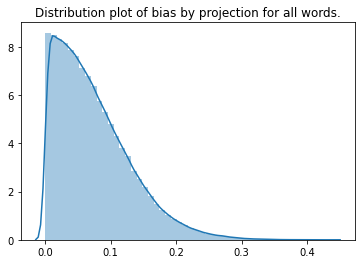

In [5]:
GlobalReport(E).generate(n=100)

Direct bias (Bias by projection on the PCA based gender direction): 0.2685959041118622
Proximity bias (Ratio of biased neighbours by Indirect Bias): 0.35
Neighbour Analysis: 
        Neighbour  Bias by projection
0        pregnant            0.350458
1            maid            0.335656
2          matron            0.329037
3           woman            0.302885
4      prostitute            0.293589
5         midwife            0.282033
6          mother            0.280953
7     housekeeper            0.279472
8      girlfriend            0.272616
9    receptionist            0.238304
10          nanny            0.234362
11         nurses            0.222142
12        ratched            0.215232
13       midwives            0.211954
14   anesthetists            0.211205
15           wife            0.208924
16        nursing            0.183523
17    anesthetist            0.169238
18      assistant            0.129579
19      therapist            0.117031
20         caring          

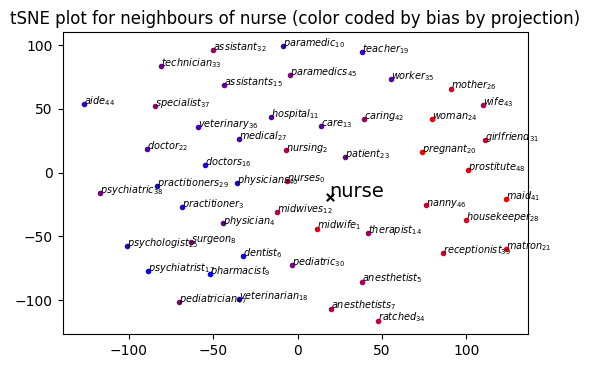

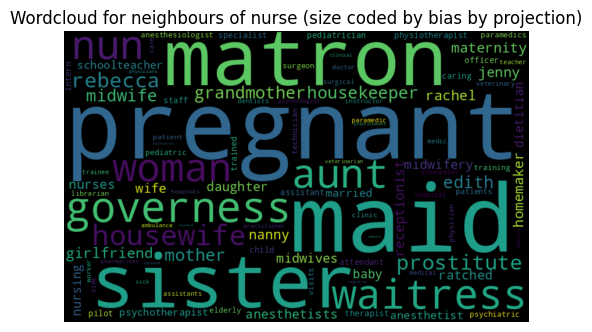

In [6]:
WordReport(E).generate('nurse')

# Visualizations

In [7]:
import numpy as np
import pandas as pd
import fee
import matplotlib.pyplot as plt
from fee.embedding import loader
from fee.metrics import DirectBias
from fee.visualize import GCT, PCAComponents, NeighbourPlot, NBWordCloud

In [8]:
E = loader.WE().load('../glove', normalize=True)
g = fee.utils.get_g(E)

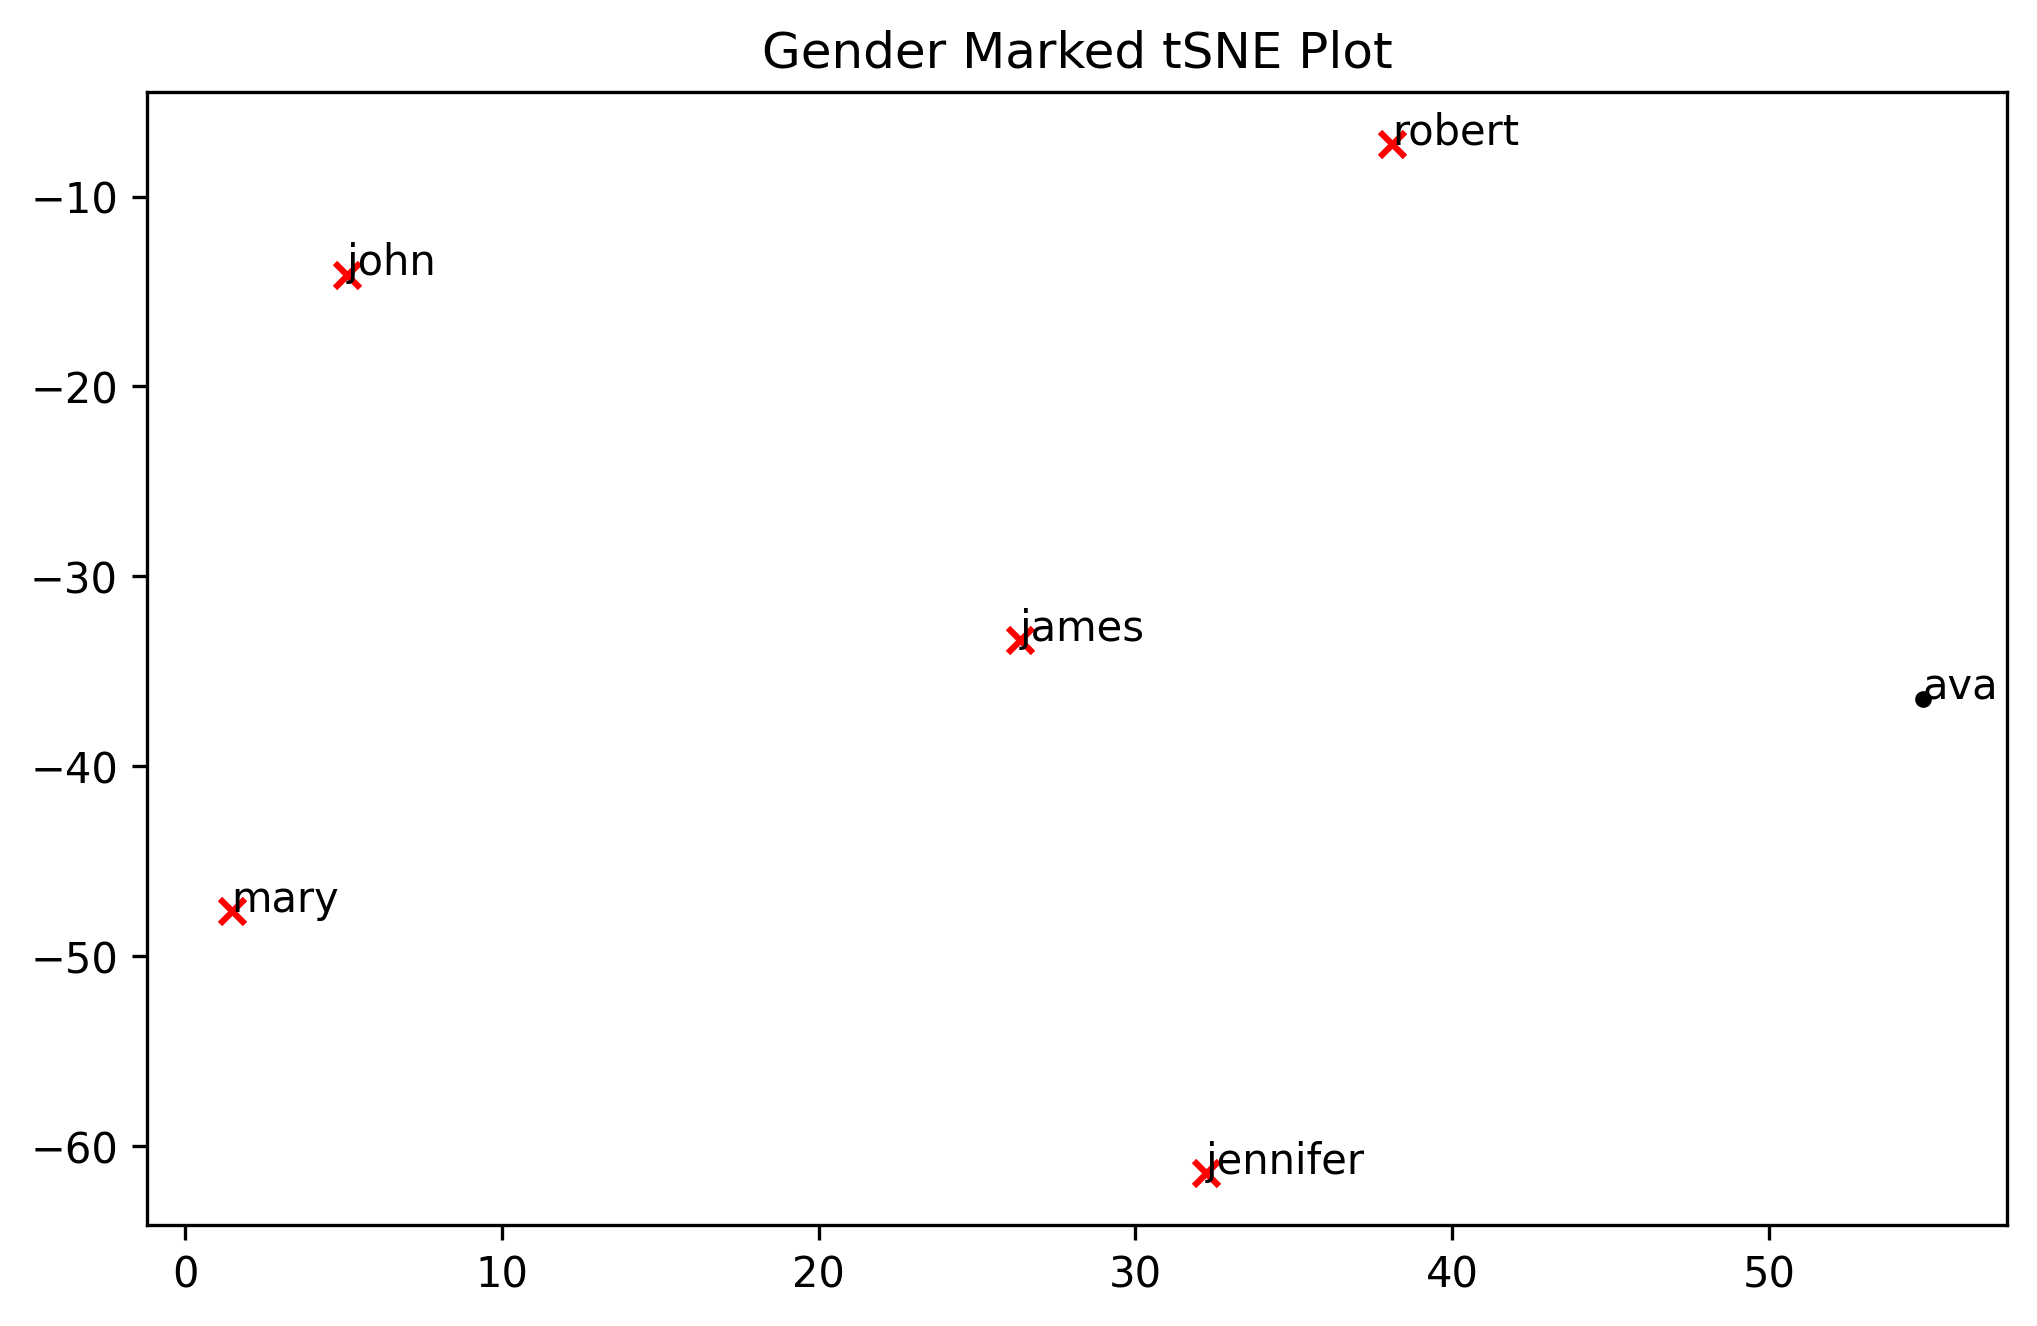

In [9]:
words = "mary ava jennifer john james robert".split()
GCT(E).run(words, title="Gender Marked tSNE Plot")

In [10]:
definitional = [['woman', 'man'],
                        ['girl', 'boy'],
                        ['she', 'he'],
                        ['mother', 'father'],
                        ['daughter', 'son'],
                        ['gal', 'guy'],
                        ['female', 'male'],
                        ['her', 'his'],
                        ['herself', 'himself'],
                        ['mary', 'john']]

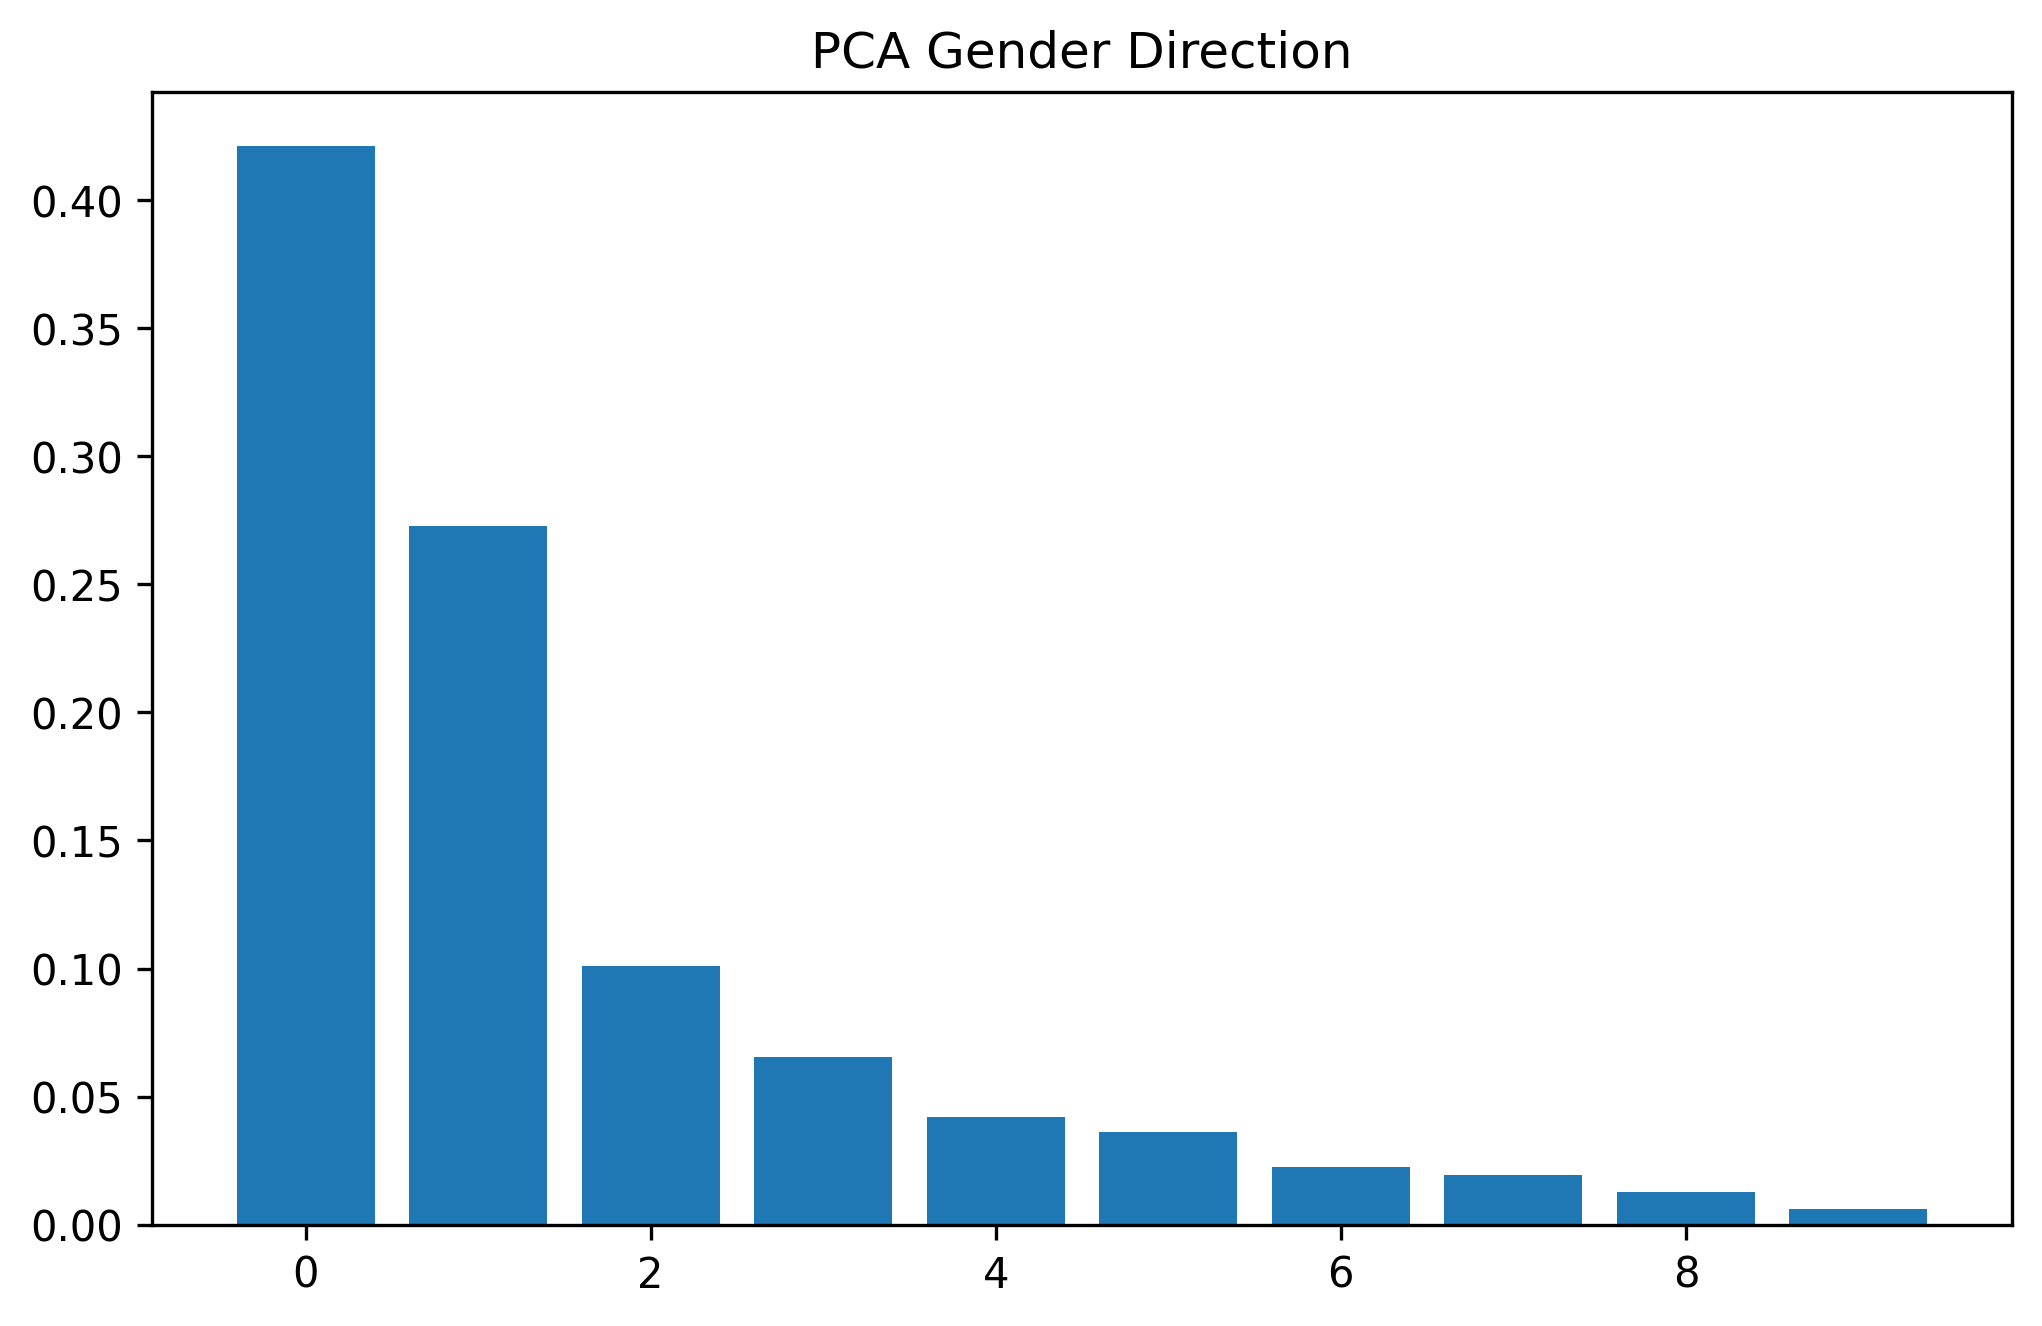

In [11]:
PCAComponents(E).run(definitional, title="PCA Gender Direction")

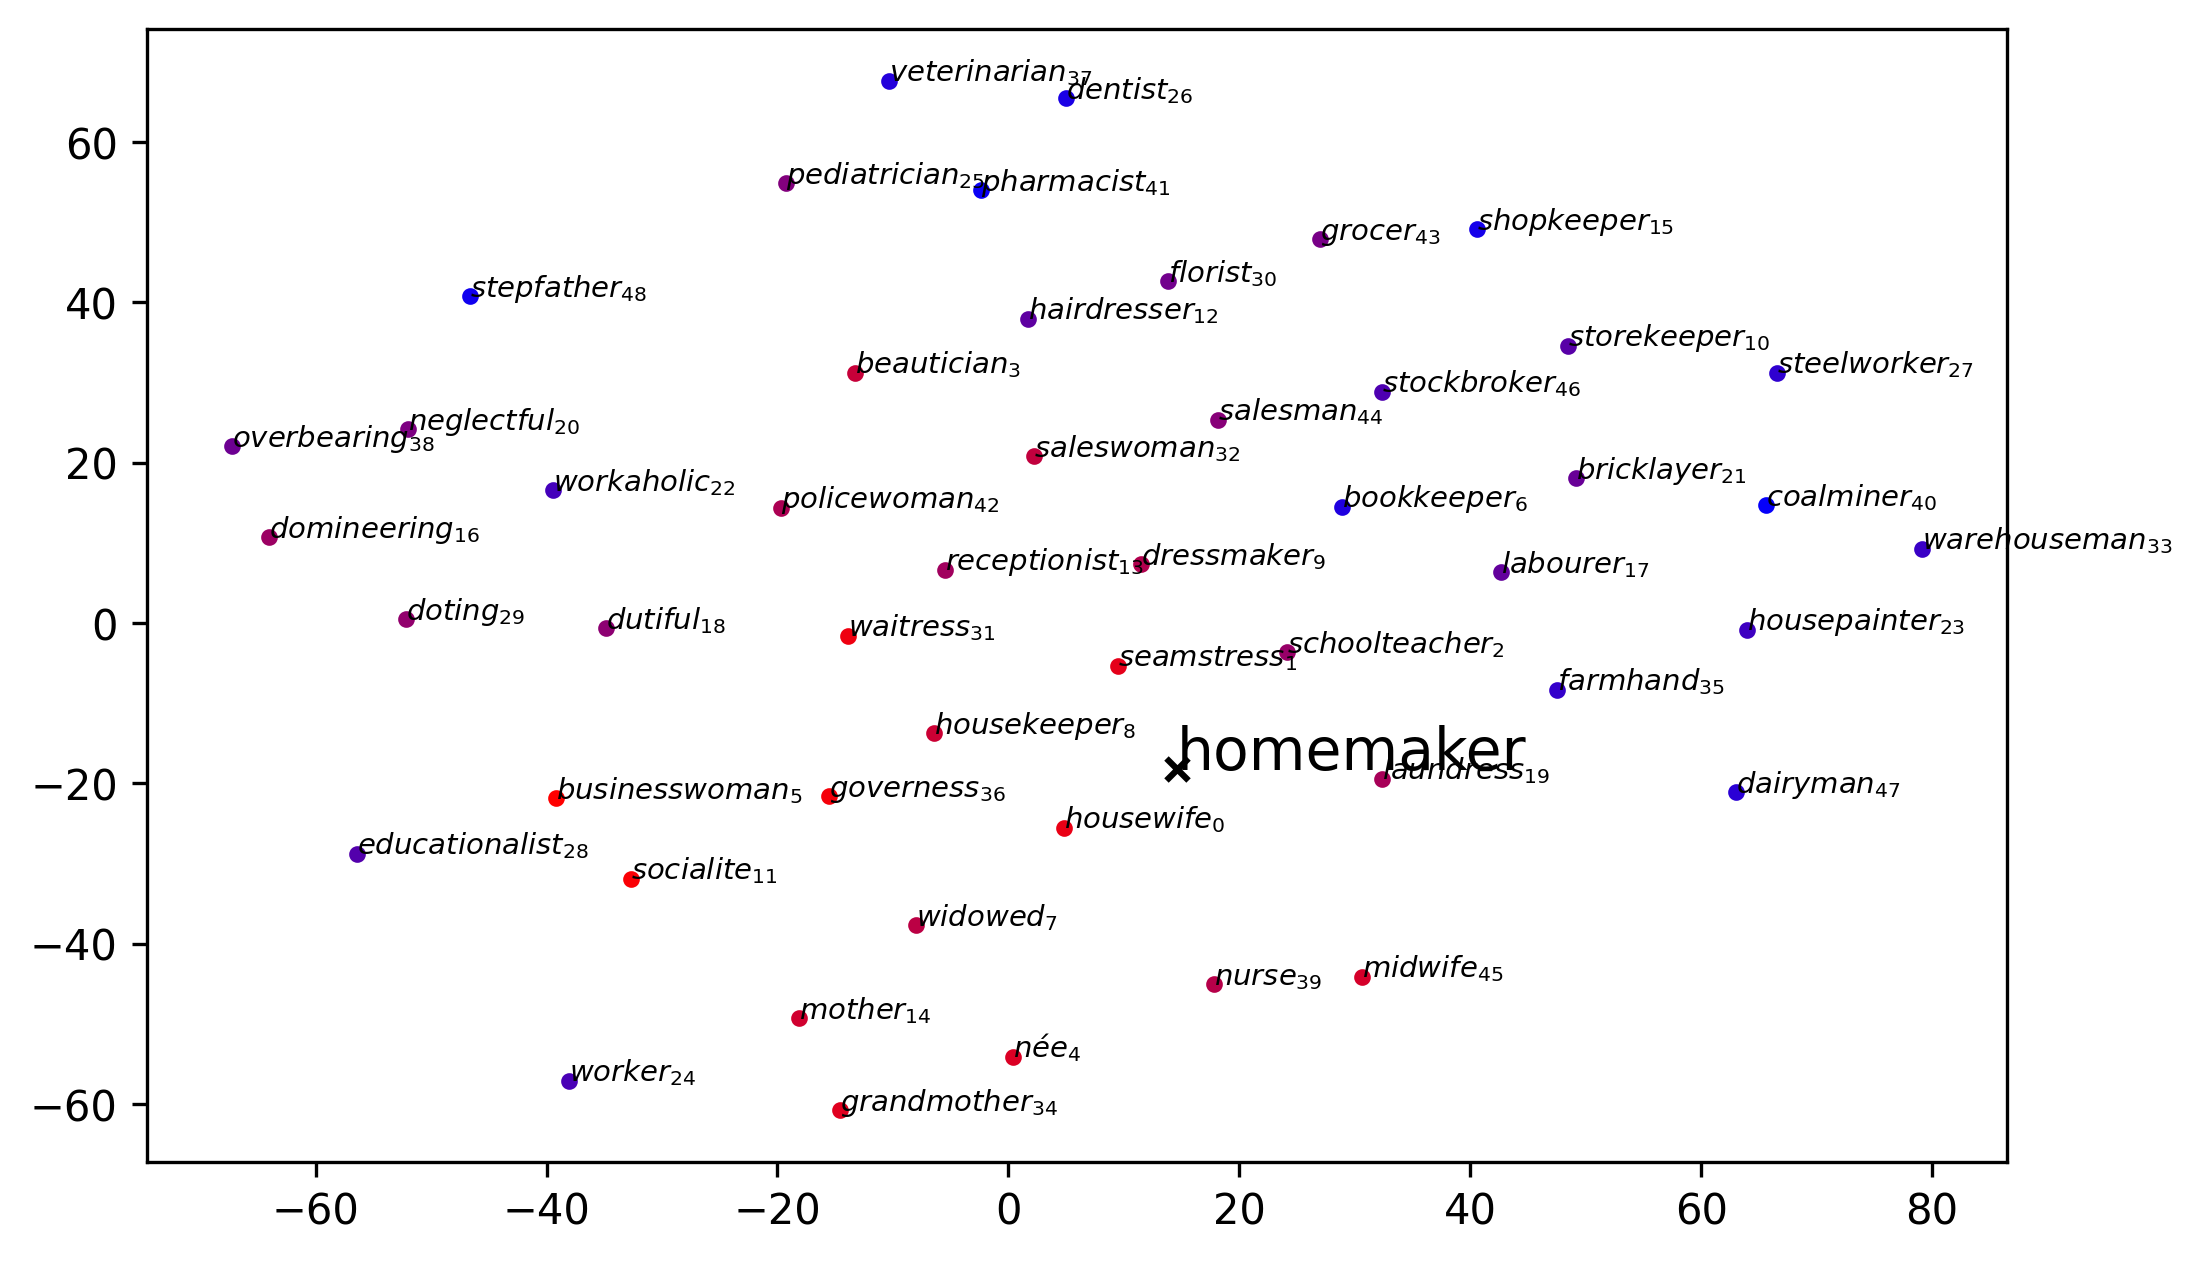

In [12]:
NeighbourPlot(E).run('homemaker', annotate=True, n=50)

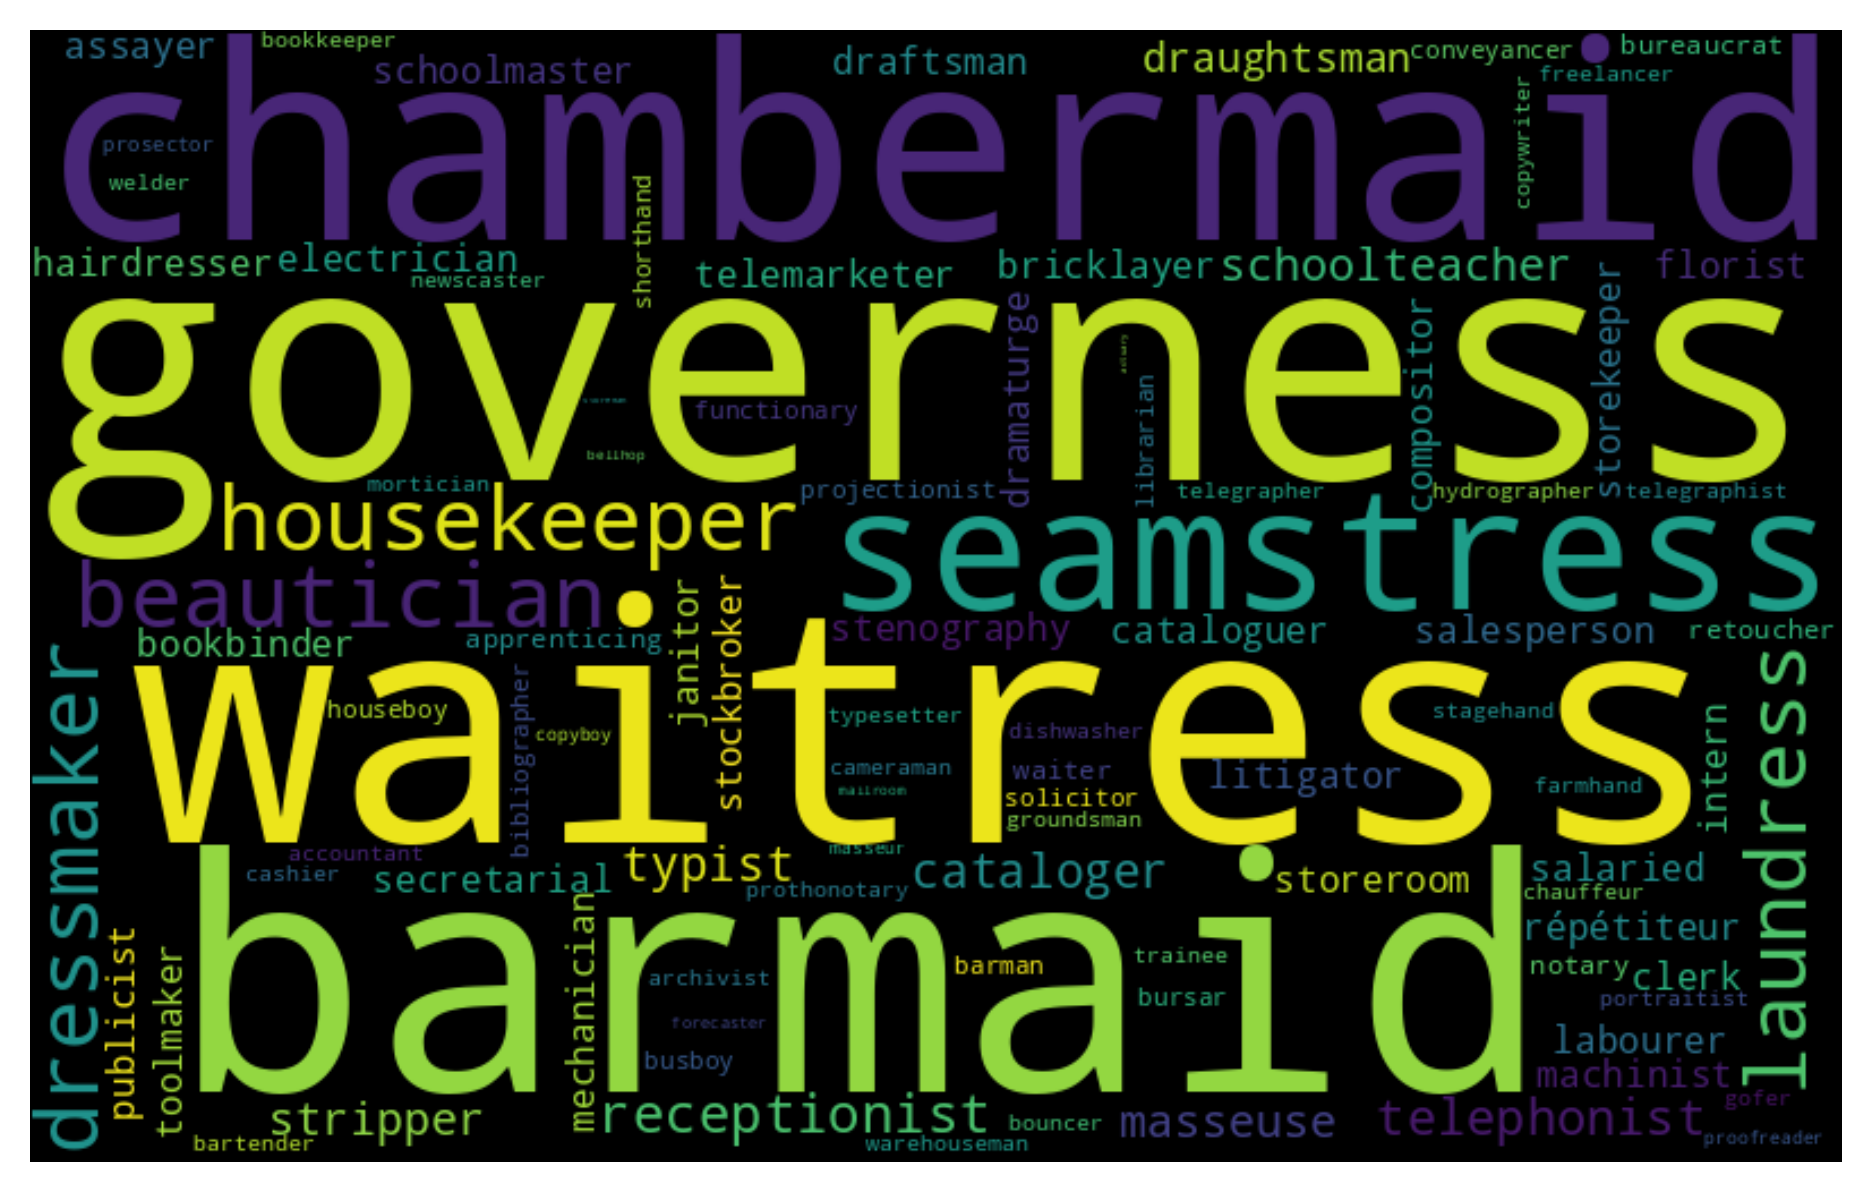

In [13]:
NBWordCloud(E).run('stenographer')

# Debiasing

In [14]:
import numpy as np
import pandas as pd
import fee
import matplotlib.pyplot as plt
from fee.embedding import loader
from fee.metrics import DirectBias
from fee.debias import HardDebias, RANDebias, HSRDebias

In [15]:
E = loader.WE().load('../glove', normalize=True)
g = fee.utils.get_g(E)

In [16]:
gender_list = "he she him her uncle aunt father mother".split()
nongender_list = list(set(E.words) - set(gender_list))
DirectBias(E).compute(nongender_list)

0.07409425600458125

In [17]:
E = HSRDebias(E).run(gender_list)

In [18]:
DirectBias(E).compute(nongender_list)

0.0718253130671279

In [19]:
words = "nanny nurse warrior doctor engineer".split()
DirectBias(E).compute(words)

0.15324777935165912

In [20]:
E = RANDebias(E).run(words)

In [21]:
DirectBias(E).compute(words)

0.017039832612499594

In [22]:
E = HardDebias(E).run(words)

In [23]:
DirectBias(E).compute(words)

0.010656276158988476

# Metrics

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fee.embedding import loader
from fee.metrics import DirectBias, IndirectBias, GIPE, ProxBias, WEAT, PMN, SemBias

In [25]:
E = loader.WE().load('../glove', normalize=True)
words = "nurse nanny warrior engineer doctor calculate bias metrics for these words".split()

In [26]:
SemBias(E).compute()

(0.8022727272727272, 0.10681818181818181, 0.09090909090909091)

In [27]:
PMN(E).compute(words)

67.63636363636364

In [28]:
DirectBias(E).compute(words)

0.1095523489639163

In [29]:
IndirectBias(E).compute('woman', 'nanny')

0.27426746

In [30]:
GIPE(E).compute(words)

0.2826666666666667

In [31]:
ProxBias(E).compute(words)

0.12727272727272726

In [32]:
WEAT(E).compute("female", "male", "arts", "math", p_val=True)

(0.3509856, 0.0)